In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

from part1_nn_lib import LinearLayer, MultiLayerNetwork

--- Epoch 0 ---
MSE: 14167.261602373164
--- Epoch 20000 ---
MSE: 83.74663531405909
--- Epoch 40000 ---
MSE: 49.82618167614312
--- Epoch 60000 ---
MSE: 37.531576136742764
--- Epoch 80000 ---
MSE: 33.07534665989168

Results:
MSE: 31.460214868308164


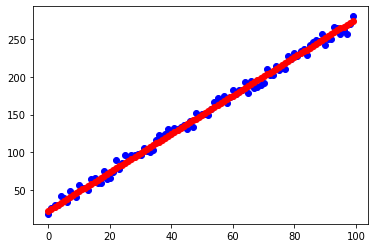

In [2]:
## y = a*x + b

# Modify these
epochs = 100000
number_of_epoch_results_to_print = 5
learning_rate = 1e-4
a = 2.5
b = 25

# Create linear data set with some noise
x = np.arange(0, 100)
noise = np.random.uniform(-10, 10, x.size)
y_gold = a * x + b + noise
plt.scatter(x, y_gold, c="b")

# Ensure that x and y have the expected format
x = x[:, np.newaxis]
y_gold = y_gold[:, np.newaxis]

# Define multi layer neuron setup 
input_dim = 1
neurons = np.array([1])
activations = np.array(["identity"])

multi_layers = MultiLayerNetwork(input_dim, neurons, activations)

for epoch in range(epochs):
    y_pred = multi_layers.forward(x)
    grad_mse_wrt_ouputs = (y_pred - y_gold) / len(y_gold)
    grad_loss_wrt_inputs = multi_layers.backward(grad_mse_wrt_ouputs)
    multi_layers.update_params(learning_rate)

    if epoch % (epochs//number_of_epoch_results_to_print) == 0:
        print(f"--- Epoch {epoch} ---")
        print("MSE:", np.square(y_pred - y_gold).mean())
       # print("W:", layer._W, "b:", layer._b)

print("\nResults:")
print("MSE:", np.square(y_pred - y_gold).mean())
#print("a:", layer._W, "b:", layer._b)

# Plot best fit line on top of data
plt.scatter(x, y_pred, c="r")
plt.show()

In [3]:
## 2 input features (3 including bias), one output feature

# Modify these
epochs = 100000
number_of_epoch_results_to_print = 5
learning_rate = 1e-3
weights = np.array([4, 2.5, 1.5])


# Create random data
seed = 60012
rg = default_rng(seed)
n_samples = 100
x = rg.random((n_samples, 2)) * 10.0
x = np.hstack((x, np.ones((n_samples, 1))))
y = np.matmul(x, weights)

# Add noise to y
noise = rg.standard_normal(y.shape)
y = y + noise

# Split data set into train and test
x_train = np.array(x[:80, :2])
y_train = y[:80, np.newaxis]
x_test = x[80:, :2]
y_test = y[80:, np.newaxis]

layer = LinearLayer(n_in=2, n_out=1)
for epoch in range(epochs):
    y_pred = layer(x_train)
    grad_sse_wrt_ouputs = (y_pred - y_train) / len(y_train)
    grad_loss_wrt_inputs = layer.backward(grad_sse_wrt_ouputs)
    layer.update_params(learning_rate)

    if epoch % (epochs//number_of_epoch_results_to_print) == 0:
        print(f"--- Epoch {epoch} ---")
        print("MSE:", np.square(y_pred - y_train).mean())
        print("W:", layer._W, "b:", layer._b)

print("\nResults:")
print("MSE (training set):", np.square(layer(x_train) - y_train).mean())
print("MSE (test set):", np.square(layer(x_test) - y_test).mean())
print("W:", layer._W, "b:", layer._b)

--- Epoch 0 ---
MSE: 699.2442401572521
W: [[1.16237485]
 [1.47017581]] b: [0.02486918]
--- Epoch 20000 ---
MSE: 1.274847227255832
W: [[4.00889358]
 [2.5484858 ]] b: [1.20685575]
--- Epoch 40000 ---
MSE: 1.273942756081996
W: [[4.00135901]
 [2.54337129]] b: [1.286058]
--- Epoch 60000 ---
MSE: 1.2739345316831343
W: [[4.00064053]
 [2.54288358]] b: [1.29361053]
--- Epoch 80000 ---
MSE: 1.2739344568982882
W: [[4.00057202]
 [2.54283708]] b: [1.29433072]

Results:
MSE (training set): 1.2739344562182677
MSE (test set): 1.0374361966494121
W: [[4.00056548]
 [2.54283264]] b: [1.29439939]
